# Image Segmentation using Graph Cuts

### imports

In [64]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

# The laplacian matrix

In the following lines of code we demonstrate some properties of the laplacian which are the basis for Shi's cut normalization using scaled volumes.

Creating Graph G such that:

|E| = 9

|V| = 6

for each v in V:

    deg(v) = 3

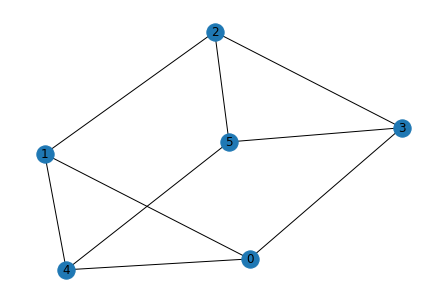

In [54]:
G = nx.random_regular_graph(3, 6)
nx.draw(G, with_labels=True )

## Creating the incident matrix

In [55]:
incidence = nx.linalg.graphmatrix.incidence_matrix(G, oriented=False).toarray() # oriented = False for positive 1

In [56]:
incidence

array([[1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.]])

## Creating the adjacency matrix for the graph G

In [57]:
A = nx.adjacency_matrix(G).toarray()

In [58]:
A

array([[0, 1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [0, 0, 1, 1, 1, 0]])

## Degree matrix D

In [8]:
D = np.diag(np.ones(len(G.nodes))*3)

In [59]:
D

array([[3., 0., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 0., 3.]])

In [10]:
L = D - A

In [60]:
L

array([[ 3., -1.,  0., -1.,  0., -1.],
       [-1.,  3., -1.,  0.,  0., -1.],
       [ 0., -1.,  3., -1., -1.,  0.],
       [-1.,  0., -1.,  3., -1.,  0.],
       [ 0.,  0., -1., -1.,  3., -1.],
       [-1., -1.,  0.,  0., -1.,  3.]])

In [61]:
np.linalg.eigh(L)

(array([1.70002901e-15, 2.00000000e+00, 3.00000000e+00, 3.00000000e+00,
        5.00000000e+00, 5.00000000e+00]),
 array([[-0.40824829,  0.40824829,  0.05147024,  0.57505143,  0.27472534,
         -0.5077985 ],
        [-0.40824829,  0.40824829,  0.47227403, -0.33210025, -0.57712907,
          0.01598013],
        [-0.40824829, -0.40824829,  0.47227403, -0.33210025,  0.57712907,
         -0.01598013],
        [-0.40824829, -0.40824829,  0.05147024,  0.57505143, -0.27472534,
          0.5077985 ],
        [-0.40824829, -0.40824829, -0.52374427, -0.24295118, -0.30240373,
         -0.49181838],
        [-0.40824829,  0.40824829, -0.52374427, -0.24295118,  0.30240373,
          0.49181838]]))

## Laplacian is symmetric

In [12]:
L_transpose = np.transpose(L)

In [13]:
np.array_equal(L, L_transpose)

True

## The determinanat euqals 0

In [14]:
np.linalg.det(L)

-1.6653345369377386e-14

## The trace is double the amound of edges

In [15]:
np.trace(L)

18.0

In [16]:
len(G.edges)

9

In [17]:
values,vectors  = np.linalg.eigh(L)

In [18]:
np.round(values, decimals = 5)

array([0., 2., 3., 3., 5., 5.])

In [19]:
np.round(vectors, decimals = 5)

array([[-0.40825,  0.40825,  0.05147,  0.57505,  0.27473, -0.5078 ],
       [-0.40825,  0.40825,  0.47227, -0.3321 , -0.57713,  0.01598],
       [-0.40825, -0.40825,  0.47227, -0.3321 ,  0.57713, -0.01598],
       [-0.40825, -0.40825,  0.05147,  0.57505, -0.27473,  0.5078 ],
       [-0.40825, -0.40825, -0.52374, -0.24295, -0.3024 , -0.49182],
       [-0.40825,  0.40825, -0.52374, -0.24295,  0.3024 ,  0.49182]])

## Simple exmaple of Shi's proposed partition with matrix X

In [20]:
X = np.array([[1, 0, 0],
             [1, 0, 0],
             [0, 1, 0],
             [0, 1, 0],
             [0, 1, 0],
             [0, 0, 1]])

In [62]:
X

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [67]:
pd.DataFrame(cosine_similarity(X))

,0,1,2,3,4,5
0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
XT_D_X = np.matmul(np.matmul(np.transpose(X),D), X)
Z = np.sqrt(np.matmul(X, XT_D_X))
Z = 1/Z

/tmp/ipykernel_118544/366989216.py:3: RuntimeWarning: divide by zero encountered in true_divide
  Z = 1/Z


In [23]:
Z

array([[0.40824829,        inf,        inf],
       [0.40824829,        inf,        inf],
       [       inf, 0.33333333,        inf],
       [       inf, 0.33333333,        inf],
       [       inf, 0.33333333,        inf],
       [       inf,        inf, 0.57735027]])

In [24]:
Z[Z == -np.inf] = 0
Z[Z == np.inf] = 0

In [25]:
Z

array([[0.40824829, 0.        , 0.        ],
       [0.40824829, 0.        , 0.        ],
       [0.        , 0.33333333, 0.        ],
       [0.        , 0.33333333, 0.        ],
       [0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.57735027]])

In [26]:
np.matmul(np.matmul(np.transpose(Z),D), Z)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# Full example of Shi's suggested normalized cut segmenatation 

## The following code is using scikit image package and matplotlib in order to demonstrate how image segmentation with graph cut works.

### The steps presented below are : 

1) creating a graph

2) setting the edges weight to pairwise similirity between the pixels

3) use the constructed structure as an input to min-cut max-flow algorithm

4) return the results

In [27]:
def process_image_cut(compactness, n_segments,cut):
    
    # creating segments based on the input image
    labels = segmentation.slic(img, compactness=compactness, n_segments=n_segments, start_label=1)
    
    # constructing segmented image
    segmented = color.label2rgb(labels, img, kind='avg', bg_label=0)
    
    # creating adjacency matrix with pair-wise similarity
    g = graph.rag_mean_color(img, labels, mode='similarity')
    
    # performing normalized cut on the lables produced
    cut_labels = graph.cut_normalized(labels, g, num_cuts = cut)
    
    # constructing result image
    flow_result = color.label2rgb(cut_labels, img, kind='avg', bg_label=0)
    
    # constructing result image with marked boundaries
    marked_boundaries = segmentation.mark_boundaries(flow_result, cut_labels, (0, 250, 0))
    
    return segmented, flow_result, marked_boundaries

In [28]:
def process_image(compactness, n_segments):
    
    # creating segments based on the input image
    labels = segmentation.slic(img, compactness=compactness, n_segments=n_segments, start_label=1)
    
    # constructing segmented image
    segmented = color.label2rgb(labels, img, kind='avg', bg_label=0)
    
    # creating adjacency matrix with pair-wise similarity
    g = graph.rag_mean_color(img, labels, mode='similarity')
    
    # performing normalized cut on the lables produced
    cut_labels = graph.cut_normalized(labels, g)
    
    # constructing result image
    flow_result = color.label2rgb(cut_labels, img, kind='avg', bg_label=0)
    
    # constructing result image with marked boundaries
    marked_boundaries = segmentation.mark_boundaries(flow_result, cut_labels, (0, 250, 0))
    
    return segmented, flow_result, marked_boundaries

In [29]:
# reading the input image from the root directory
img = plt.imread('photo.jpeg')

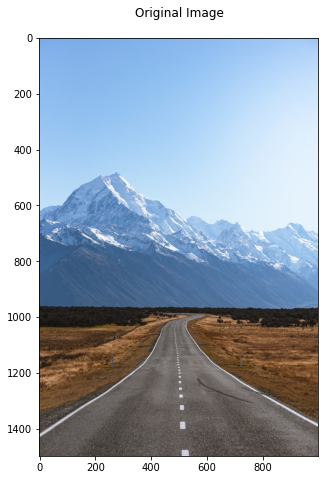

In [30]:
# loading and displaying the original image
plt.figure(figsize=(5,10))
plt.imshow(img)
plt.title(f'Original Image\n')
plt.show()

## Tunning compactness and segments count

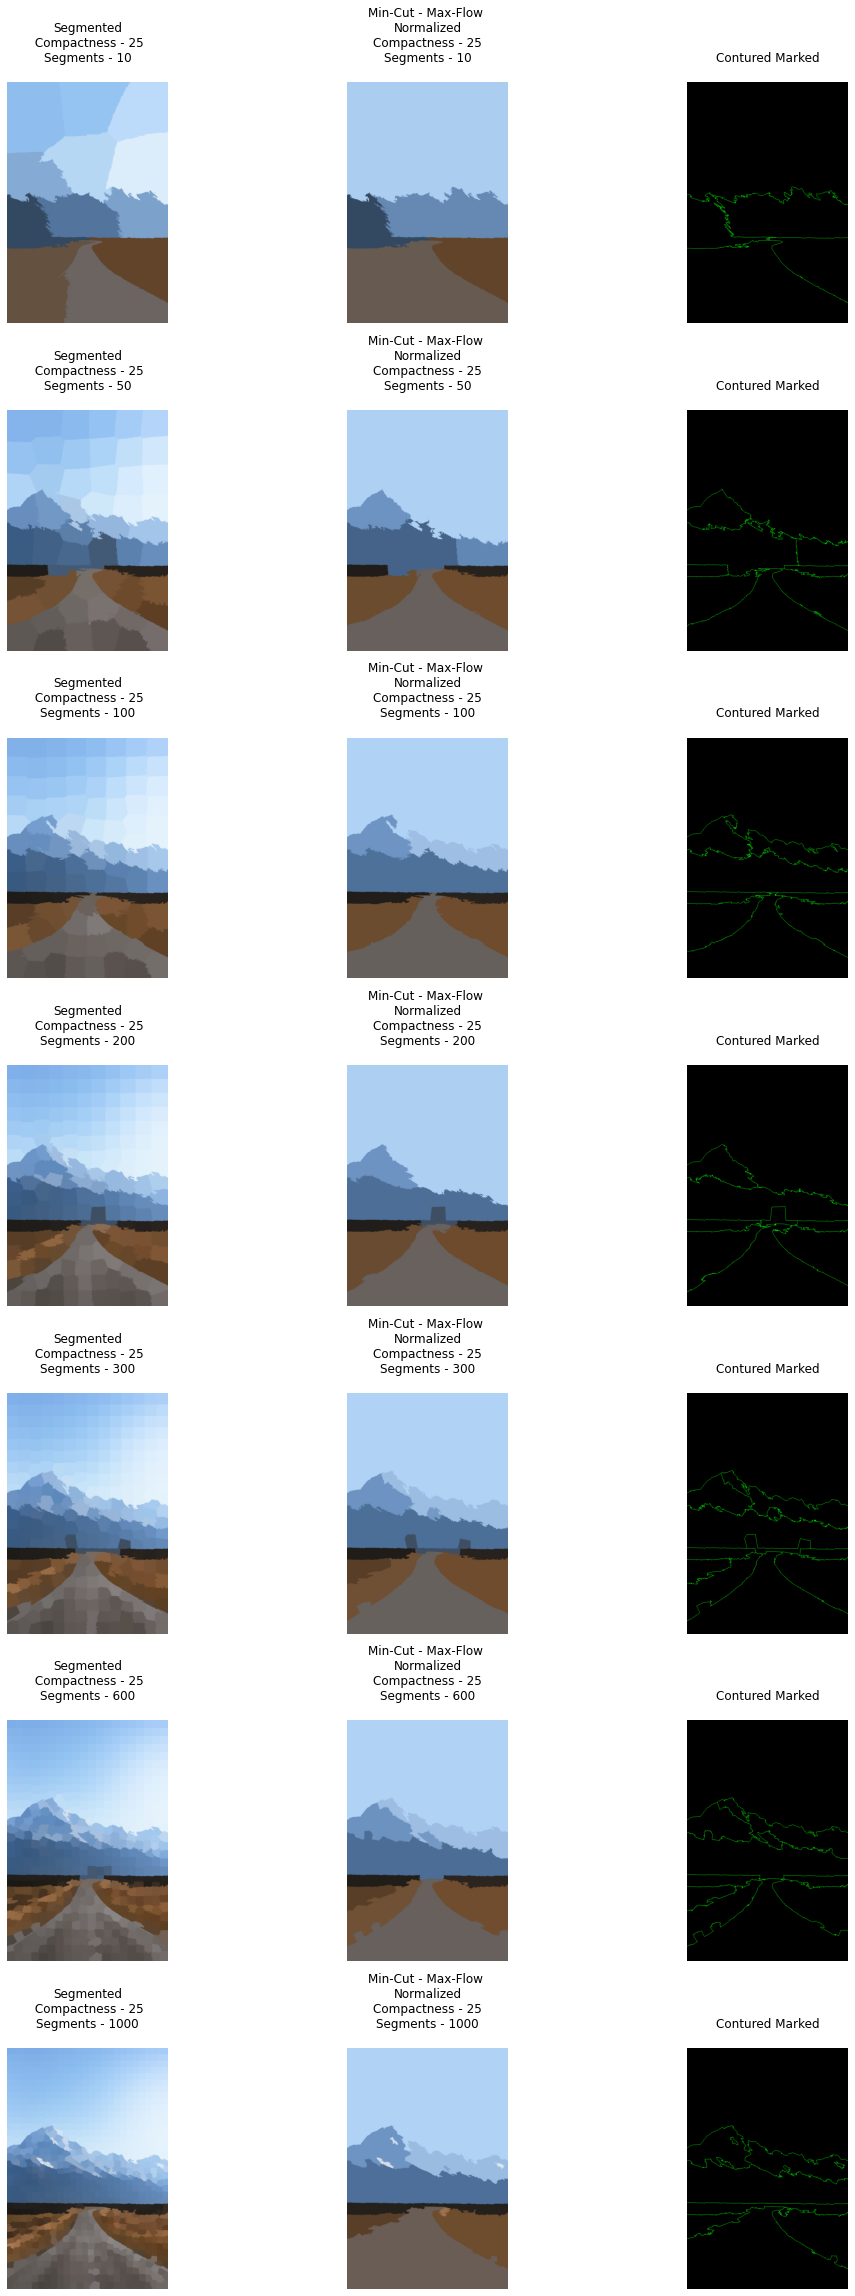

In [31]:
# initalizing campactnesses list
# Balances color proximity and space proximity. Higher values give more weight to space proximity
# The compactness value changes drastically from image to image due to diffentiation between image contrasts
# This is the value chosen after trying various others
compactnes_list = [25]

# initalizing segments count list
segments_list = [10, 50, 100, 200, 300, 600, 1000]

# initializing index counter
idx=0

# initializing plt object
fig, ax = plt.subplots(nrows=(len(compactnes_list)*len(segments_list))
                               , ncols=3, sharex=True, sharey=True, figsize=(16,32))

# iterating over all of the compacteness list elemnts        
for com in compactnes_list:
    
    # iterating over all of the segemnent sizes list elements        
    for seg in segments_list:
        
        # get current compactenes and segment size results by passing them to the process_image method
        segmented, flow_result, marked = process_image(com,seg)
        
        # first image from the left
        ax[idx][0].imshow(segmented.astype('uint8'))
        ax[idx][0].set_title(f'Segmented\n Compactness - {com}\nSegments - {seg}\n')
        
        # middle image
        ax[idx][1].imshow(flow_result.astype('uint8'))
        ax[idx][1].set_title(f'Min-Cut - Max-Flow \nNormalized\nCompactness - {com}\nSegments - {seg}\n')
        
        # last image or first from right to left
        ax[idx][2].imshow(marked.astype('uint8'))
        ax[idx][2].set_title(f'Contured Marked\n')
        
        # hiding the x and y axis
        for a in ax[idx]:
            a.axis('off')
        
        idx += 1

# tight layout helps to skip title and image overlapping
plt.tight_layout()

## Demonstrating the differences between different cut values

The cut number provided will tell the algorithm how many cuts to perform until it haults.

When cutting percedure is complete, the algorith determines what is the optimal cut from all the cuts it performed.

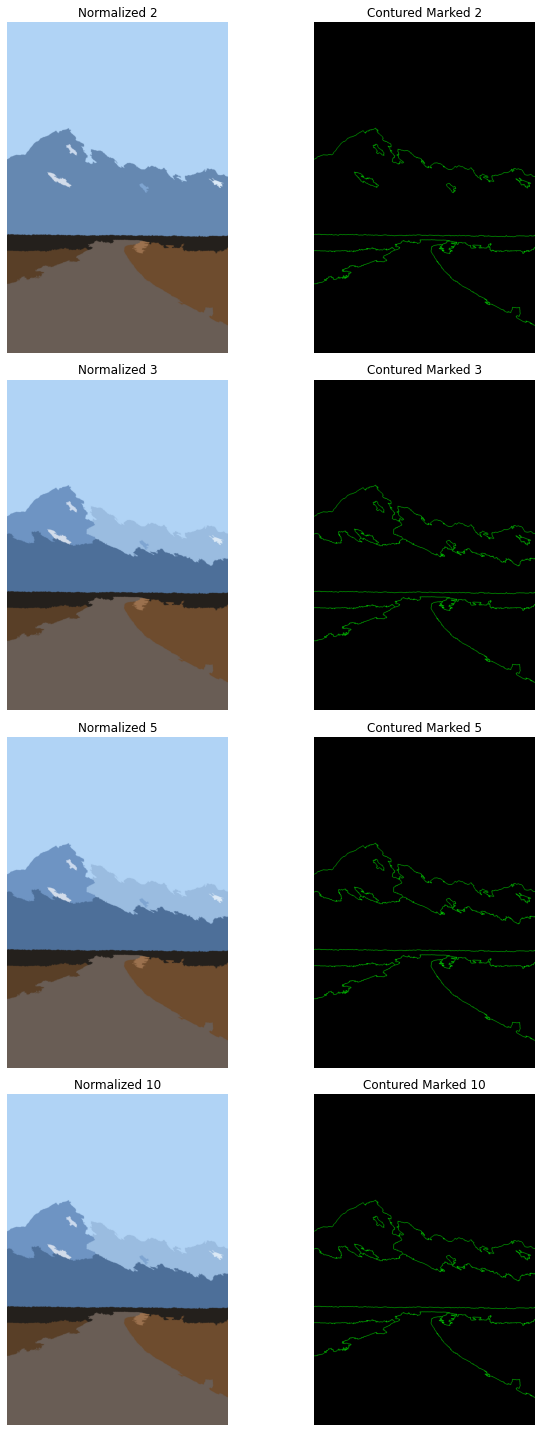

In [33]:
cuts_list = [2, 3, 5, 10]
idx = 0

fig, ax = plt.subplots(nrows=len(cuts_list), ncols=2, sharex=True, sharey=True, figsize=(10,20))


for idx,cut in enumerate(cuts_list):
# get current compactenes and segment size results by passing them to the process_image method
        segmented, flow_result, marked = process_image_cut(25,1000,cut)
        
        # middle image
        ax[idx][0].imshow(flow_result.astype('uint8'))
        ax[idx][0].set_title(f'Normalized {cut}')
        
        # last image or first from right to left
        ax[idx][1].imshow(marked.astype('uint8'))
        ax[idx][1].set_title(f'Contured Marked {cut}')
        
        # hiding the x and y axis
        for a in ax[idx]:
            a.axis('off')
        
        idx += 1

# tight layout helps to skip title and image overlapping
plt.tight_layout()

Notice the big difference is between performing 2 cuts and 3 cuts.

Further on, the result are not changing at all.